In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import itertools
from itertools import islice
file_name = "sequentiality_hfull.csv"

In [8]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from pylab import rcParams
import seaborn as sb
from scipy.stats.stats import kendalltau

/var/folders/z_/gmr1pt353239ypl_8q2ymnjc0000gn/T/ipykernel_33277/3020295428.py:7: DeprecationWarning: Please use `kendalltau` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import kendalltau


In [9]:
# Data Visualisation Settings
%matplotlib inline
rcParams['figure.figsize'] = 6,5
sb.set_style('whitegrid')

In [10]:
df_1 = pd.read_csv(file_name)
df_1.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,...,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent,c_value,topic_output,contextual
0,0,0,0,0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,...,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,3.0,"I've been to a couple concerts, but not many.","Concerts are my most favorite thing, and my bo...",1.0,My boyfriend and I went to a concert together ...,90.0,0.073301,"[-79.30367456754999, -93.97777259209145, -111....","[-79.30367456754999, -85.43623466981693, -103...."
1,1,1,1,2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,...,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,3.0,I am a mother myself,It seems just like yesterday but today makes f...,1.0,My sister gave birth to my twin niece and neph...,150.0,0.129259,"[-110.26714610431748, -78.40552307465833, -131...","[-110.26714610431748, -76.07691754008206, -122..."
2,2,2,2,4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,...,3018Q3ZVOJCZJFDMPSFXATCQG06AR3,4.0,Because I also have money problems,About a month ago I went to burning man. I was...,4.0,It is always a journey for me to go to burning...,30.0,0.079941,"[-40.44070939889245, -61.21424538813056, -32.3...","[-40.44070939889245, -56.481343377038556, -19...."
3,3,3,3,6,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,...,3018Q3ZVOJCZJFDMPSFXATCQG1OARN,1.0,"I've been on road trips before, but never to A...","Play stupid games, win stupid prizes road trip...",2.0,What happened is that I was on a trip with my ...,90.0,0.108834,"[-121.49904027654665, -23.74804430638693, -65....","[-121.49904027654665, -21.57719919472994, -65...."
4,4,4,4,8,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,...,304SM51WA4QG34IRAVFYVE1S8XNSBV,4.0,I really enjoy going to the zoo with friends a...,I wanted to write about one of the best days i...,1.0,Me and my girlfriend went to the zoo on a hot ...,30.0,0.079781,"[-69.25817500874533, -67.43863290138252, -86.5...","[-69.25817500874533, -64.07665745668302, -78.2..."


In [11]:
df_1 = df_1.drop(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [12]:
df_1 = df_1.rename(columns={'c_value': 'sequentiality'})
df_1.columns

Index(['AssignmentId', 'WorkTimeInSeconds', 'WorkerId', 'annotatorAge',
       'annotatorGender', 'annotatorRace', 'distracted', 'draining',
       'frequency', 'importance', 'logTimeSinceEvent', 'mainEvent', 'memType',
       'mostSurprising', 'openness', 'recAgnPairId', 'recImgPairId',
       'similarity', 'similarityReason', 'story', 'stressful', 'summary',
       'timeSinceEvent', 'sequentiality', 'topic_output', 'contextual'],
      dtype='object')

In [13]:
nlp = en_core_web_sm.load()

In [14]:
len(df_1['story'])

6854

**Named-Entity Calculations**

In [15]:
df_1['ner_count'] = [0] * len(df_1['story'])

for i in range(len(df_1['story'])):
    story = df_1['story'][i]
    ner = nlp(story)
    ner_count = len(ner.ents)
    df_1.loc[i, 'ner_count'] = ner_count

df_1.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,similarity,similarityReason,story,stressful,summary,timeSinceEvent,sequentiality,topic_output,contextual,ner_count
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,3.0,"I've been to a couple concerts, but not many.","Concerts are my most favorite thing, and my bo...",1.0,My boyfriend and I went to a concert together ...,90.0,0.073301,"[-79.30367456754999, -93.97777259209145, -111....","[-79.30367456754999, -85.43623466981693, -103....",1
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,3.0,I am a mother myself,It seems just like yesterday but today makes f...,1.0,My sister gave birth to my twin niece and neph...,150.0,0.129259,"[-110.26714610431748, -78.40552307465833, -131...","[-110.26714610431748, -76.07691754008206, -122...",10
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,4.0,Because I also have money problems,About a month ago I went to burning man. I was...,4.0,It is always a journey for me to go to burning...,30.0,0.079941,"[-40.44070939889245, -61.21424538813056, -32.3...","[-40.44070939889245, -56.481343377038556, -19....",3
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,1.0,"I've been on road trips before, but never to A...","Play stupid games, win stupid prizes road trip...",2.0,What happened is that I was on a trip with my ...,90.0,0.108834,"[-121.49904027654665, -23.74804430638693, -65....","[-121.49904027654665, -21.57719919472994, -65....",15
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,4.0,I really enjoy going to the zoo with friends a...,I wanted to write about one of the best days i...,1.0,Me and my girlfriend went to the zoo on a hot ...,30.0,0.079781,"[-69.25817500874533, -67.43863290138252, -86.5...","[-69.25817500874533, -64.07665745668302, -78.2...",13


Encoding the Memory Type
Imagined - 0
Recalled - 1
Retold - 2

In [16]:
df_1['type'] = [0]*len(df_1['story'])

for i in range(len(df_1['story'])):
    if df_1['memType'][i] == 'retold':
        df_1.loc[i, 'type'] = 2
    elif  df_1['memType'][i] == 'recalled':
        df_1.loc[i, 'type'] = 1
    else:
        df_1.loc[i, 'type'] = 0

**Finding Common Verbs and their count**

In [17]:
def most_frequent_verb(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Extract verbs and count their occurrences
    verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    verb_counts = Counter(verbs)

    # Find the most frequent verb
    most_common_verb, count = verb_counts.most_common(1)[0]

    return most_common_verb, count

In [18]:
df_1['common_verb'] = [""] * len(df_1['story'])
df_1['verb_count'] = [0] * len(df_1['story'])

for i in range(len(df_1['story'])):
    story = df_1['story'][i]
    most_common_verb, count = most_frequent_verb(story)
    # ner_count = len(ner.ents)
    df_1.loc[i, 'common_verb'] = most_common_verb
    df_1.loc[i, 'verb_count'] = count

df_1.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,stressful,summary,timeSinceEvent,sequentiality,topic_output,contextual,ner_count,type,common_verb,verb_count
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,1.0,My boyfriend and I went to a concert together ...,90.0,0.073301,"[-79.30367456754999, -93.97777259209145, -111....","[-79.30367456754999, -85.43623466981693, -103....",1,0,know,3
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,1.0,My sister gave birth to my twin niece and neph...,150.0,0.129259,"[-110.26714610431748, -78.40552307465833, -131...","[-110.26714610431748, -76.07691754008206, -122...",10,0,wait,2
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,4.0,It is always a journey for me to go to burning...,30.0,0.079941,"[-40.44070939889245, -61.21424538813056, -32.3...","[-40.44070939889245, -56.481343377038556, -19....",3,0,have,5
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,2.0,What happened is that I was on a trip with my ...,90.0,0.108834,"[-121.49904027654665, -23.74804430638693, -65....","[-121.49904027654665, -21.57719919472994, -65....",15,0,have,4
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,1.0,Me and my girlfriend went to the zoo on a hot ...,30.0,0.079781,"[-69.25817500874533, -67.43863290138252, -86.5...","[-69.25817500874533, -64.07665745668302, -78.2...",13,0,get,5


**Finding Common Bi-Grams and their count**

In [19]:
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

def most_occurring_bigrams(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove punctuation
    words = [word for word in words if word.isalnum()]

    # Generate bigrams excluding those with a period
    bigrams = [(word1, word2) for word1, word2 in ngrams(words, 2) if '.' not in (word1, word2)]

    # Count the occurrences of each bigram
    bigram_counts = Counter(bigrams)

    # Find the most common bigrams
    most_common_bigrams = bigram_counts.most_common()

    return most_common_bigrams[:3]

In [20]:
df_1['common_bigram'] = [[] for _ in range(len(df_1['story']))]

In [21]:
for i in range(len(df_1['story'])):
    story = df_1['story'][i]
    most_common_bigrams = most_occurring_bigrams(story)
    df_1['common_bigram'][i].extend(most_common_bigrams)

df_1.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,summary,timeSinceEvent,sequentiality,topic_output,contextual,ner_count,type,common_verb,verb_count,common_bigram
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,My boyfriend and I went to a concert together ...,90.0,0.073301,"[-79.30367456754999, -93.97777259209145, -111....","[-79.30367456754999, -85.43623466981693, -103....",1,0,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,..."
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,My sister gave birth to my twin niece and neph...,150.0,0.129259,"[-110.26714610431748, -78.40552307465833, -131...","[-110.26714610431748, -76.07691754008206, -122...",10,0,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was..."
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,It is always a journey for me to go to burning...,30.0,0.079941,"[-40.44070939889245, -61.21424538813056, -32.3...","[-40.44070939889245, -56.481343377038556, -19....",3,0,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin..."
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,What happened is that I was on a trip with my ...,90.0,0.108834,"[-121.49904027654665, -23.74804430638693, -65....","[-121.49904027654665, -21.57719919472994, -65....",15,0,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),..."
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,Me and my girlfriend went to the zoo on a hot ...,30.0,0.079781,"[-69.25817500874533, -67.43863290138252, -86.5...","[-69.25817500874533, -64.07665745668302, -78.2...",13,0,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]"


In [22]:
df_recall = df_1.iloc[2756:5535]
df_recall = df_recall.sample(frac=1).reset_index(drop=True)
df_recall.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,summary,timeSinceEvent,sequentiality,topic_output,contextual,ner_count,type,common_verb,verb_count,common_bigram
0,34J10VATJGKEDWHKO1IAM1Q4DK1IQI,1678,00X21TD8,25.0,man,asian,1.0,1.0,5.0,5.0,...,I recently adopted a new dog a couple of month...,6.000000e+01,0.043277,"[-53.92656513387175, -57.942284710089815, -78....","[-53.92656513387175, -59.54968625715595, -80.4...",5,1,go,6,"[((When, I), 3), ((I, went), 2), ((went, to), 2)]"
1,3PZDLQMM0U768ATZUGWNFGU64BD2CK,1821,ZZR0XKON,30.0,man,asian,2.0,5.0,5.0,5.0,...,My grandmother passed away this summer. I deta...,9.000000e+01,0.067652,"[-33.732459611762586, -103.12657808096436, -17...","[-33.732459611762586, -101.24914487714044, -16...",10,1,pass,3,"[((nursing, home), 4), ((it, was), 3), ((the, ..."
2,3LS2AMNW5GCO9ISNMWVF6YMQXI7QOE,721,9813YBHK,30.0,man,white,1.0,3.0,2.0,4.0,...,I got a promotion and a large salary increase....,9.000000e+01,0.136210,"[-44.38540701863452, -50.273940310382194, -95....","[-44.38540701863452, -49.4881080454934, -89.41...",5,1,get,3,"[((I, was), 4), ((me, to), 3), ((at, my), 3)]"
3,386CSBG1O08YKCMJM09LPY0ZF1R6QO,1625,DEH1GAZ2,50.0,man,white,1.0,2.0,3.0,4.0,...,This was about my first day as a volunteer at ...,1.200000e+02,0.089521,"[-84.67924803386362, -95.94029843936515, -92.7...","[-84.67924803386362, -98.74584875247552, -93.1...",8,1,have,6,"[((I, was), 5), ((in, the), 3), ((at, the), 3)]"
4,3E13VNJ1NOHQWSX33MSVL0IWERH1IP,3973,S9GYZGLD,50.0,man,white,1.0,4.0,4.0,5.0,...,Procrastinated getting my pickup registration ...,3.333333e+29,0.134303,"[-67.37318439027872, -204.86836919676907, -170...","[-67.37318439027872, -203.5289839673169, -166....",13,1,have,7,"[((the, Check), 7), ((Check, Engine), 7), ((En..."


In [23]:
df_imagine = df_1.iloc[:2756]
df_imagine = df_imagine.sample(frac=1).reset_index(drop=True)
df_imagine.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,summary,timeSinceEvent,sequentiality,topic_output,contextual,ner_count,type,common_verb,verb_count,common_bigram
0,34Z02EIMITZGYHSW1FNZL21WA5E0TV,627,WGESN3LX,18.0,man,native,2.0,5.0,NaN,4.0,...,My wife and I were fighting. We almost split u...,30.0,0.150375,"[-65.85880593932387, -71.23090837366902, -60.6...","[-65.85880593932387, -60.843569193023235, -53....",2,0,sit,2,"[((it, was), 3), ((the, other), 3), ((our, own..."
1,37UQDCYH6YH9TKW5R98N1ZZ3HDS7VS,3329,T4O0B1P3,35.0,woman,white,1.0,3.0,NaN,1.0,...,"My uncle, whom I was very close to got very si...",90.0,0.060307,"[-90.39318034038453, -175.75307598585164, -153...","[-90.39318034038453, -170.07796309354734, -153...",4,0,say,4,"[((I, was), 5), ((to, the), 4), ((he, was), 3)]"
2,3YHH42UU5C1SF4KRS6L8ZBRFF1JL0L,2721,O84AHJDC,18.0,woman,white,1.0,2.0,NaN,3.0,...,The party was a hit. I was a little jealous ab...,300.0,0.088859,"[-44.26577284951207, -134.59006877190308, -53....","[-44.26577284951207, -127.78419251582626, -51....",6,0,go,2,"[((I, did), 2), ((many, friends), 2), ((It, be..."
3,3ZY8KE4ISKPJZ21KN8HT1QGZJ1EQVY,4477,KDVB2GTP,30.0,man,white,1.0,2.0,NaN,5.0,...,This is a story of why and how I got my kidney...,150.0,0.081446,"[-40.45996253546858, -45.865216206032144, -50....","[-40.45996253546858, -44.52612092270382, -50.6...",3,0,spend,3,"[((able, to), 8), ((I, was), 4), ((I, am), 3)]"
4,3A1PQ49WVI3Q0XMJX4AALOHI3FMH1P,1898,HB9418R1,35.0,woman,white,2.0,2.0,NaN,4.0,...,Within the past six months I moved out of my p...,180.0,0.068888,"[-104.93288908884375, -76.71637015940107, -86....","[-104.93288908884375, -73.98864008810189, -85....",12,0,move,4,"[((I, was), 9), ((my, parents), 5), ((with, my..."


In [24]:
frequency_map = {}

for row in df_imagine['common_bigram']:
    # first_ele = row[0]
    # print(first_ele[0])
    first_ele = row[0]
    # bigram = tuple(tuple(item) if isinstance(item, (list, np.ndarray)) else item for item in first_ele)
    bigram = list(row[0][0])
    bigram = ' '.join(bigram)
    val = row[0][1]
    if bigram not in frequency_map:
        frequency_map[bigram] = val
    else:
        frequency_map[bigram] += val

In [25]:
imagine_frequency_map = dict(sorted(frequency_map.items(), key=lambda x: x[1], reverse=True))
img_freq_top_20 =  dict(itertools.islice(imagine_frequency_map.items(), 20))

In [26]:
frequency_map_2 = {}

for row in df_recall['common_bigram']:
    first_ele = row[0]
    # print(first_ele[0])
    bigram = list(row[0][0])
    bigram = ' '.join(bigram)
    val = row[0][1]
    if bigram not in frequency_map_2:
        frequency_map_2[bigram] = val
    else:
        frequency_map_2[bigram] += val

In [27]:
recall_frequency_map = dict(sorted(frequency_map_2.items(), key=lambda x: x[1], reverse=True))
recall_freq_top_20 =  dict(itertools.islice(recall_frequency_map.items(), 20))

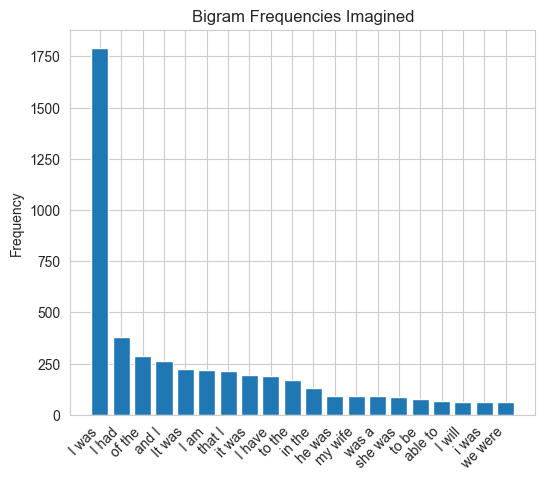

In [28]:
fig, ax = plt.subplots()

ax.bar(list(img_freq_top_20.keys()), list(img_freq_top_20.values()))

# Customize the plot
# ax.set_xlabel('Bigram-Imagined')
ax.set_ylabel('Frequency')
ax.set_title('Bigram Frequencies Imagined')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

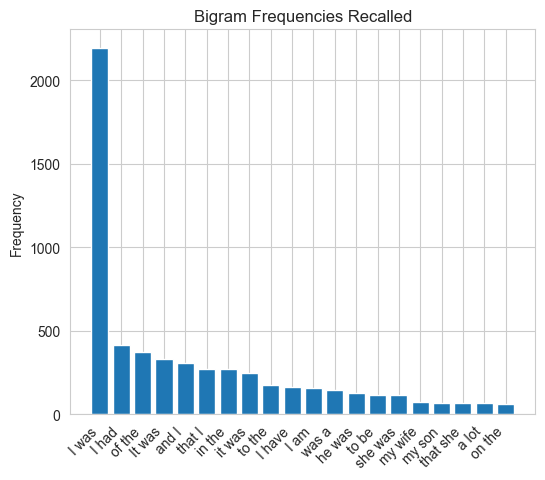

In [29]:
fig, ax = plt.subplots()

ax.bar(list(recall_freq_top_20.keys()), list(recall_freq_top_20.values()))

# Customize the plot
# ax.set_xlabel('Bigram-Recall')
ax.set_ylabel('Frequency')
ax.set_title('Bigram Frequencies Recalled')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

Plot for Verb Frequencies -->

{'have': 3208, 'go': 2033, 'get': 1307, 'feel': 506, 'see': 419, 'do': 388, 'make': 270, 'take': 241, 'know': 219, 'move': 163, 'think': 161, 'start': 147, 'say': 140, 'tell': 122, 'come': 119, 'find': 116, 'play': 108, 'want': 108, 'work': 107, 'be': 91}


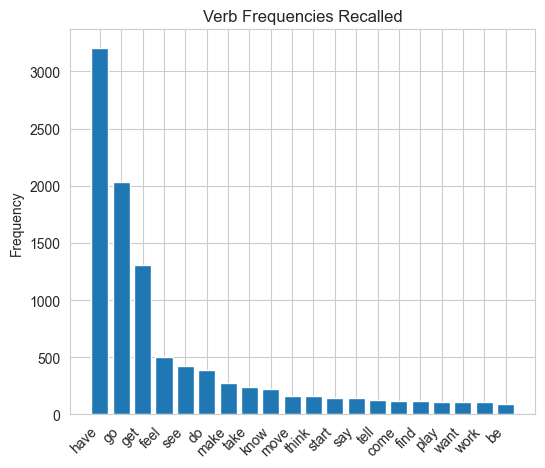

In [30]:
recall_verb_count = df_recall.groupby('common_verb')['verb_count'].sum().to_dict()
recall_verb_map = dict(sorted(recall_verb_count.items(), key=lambda x: x[1], reverse=True))
recall_verb_20 = dict(itertools.islice(recall_verb_map.items(), 20))

print(recall_verb_20)

fig, ax = plt.subplots()

ax.bar(list(recall_verb_20.keys()), list(recall_verb_20.values()))

# Customize the plot
# ax.set_xlabel('Verb-Recall')
ax.set_ylabel('Frequency')
ax.set_title('Verb Frequencies Recalled')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

{'have': 2951, 'go': 1605, 'get': 1323, 'feel': 410, 'see': 409, 'know': 339, 'do': 327, 'think': 284, 'make': 250, 'take': 222, 'want': 181, 'tell': 180, 'say': 143, 'start': 112, 'come': 97, 'happen': 85, 'help': 85, 'meet': 82, 'look': 67, 'find': 64}


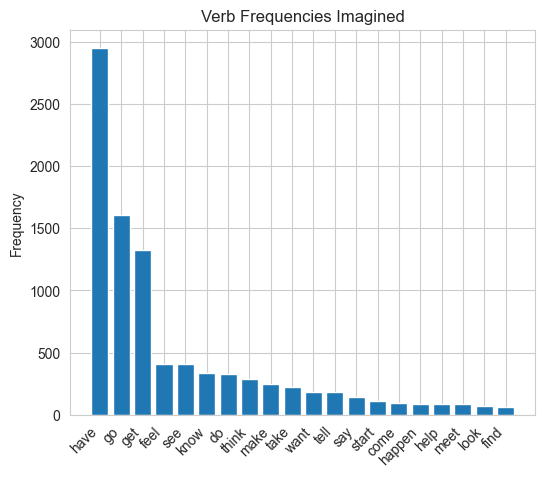

In [31]:
img_verb_count = df_imagine.groupby('common_verb')['verb_count'].sum().to_dict()
img_verb_map = dict(sorted(img_verb_count.items(), key=lambda x: x[1], reverse=True))
img_verb_20 = dict(itertools.islice(img_verb_map.items(), 20))

print(img_verb_20)

fig, ax = plt.subplots()

ax.bar(list(img_verb_20.keys()), list(img_verb_20.values()))

# Customize the plot
#ax.set_xlabel('Verb-Imaginary')
ax.set_ylabel('Frequency')
ax.set_title('Verb Frequencies Imagined')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

**Modal Verbs Analysis**

In [32]:
df_1['modal_verb_freq'] = [None]*len(df_1['story'])

In [33]:
modal_verbs = ["can", "could", "may", "might", "shall", "should", "will", "would", "must"]

def get_modal_verbs(text):
    words = text.lower().split()
    return [word for word in words if word in modal_verbs]

# def calculate_modal_frequencies(modal_verbs):
#     return dict(Counter(modal_verbs))

def calculate_modal_frequencies(text):
    # Load SpaCy model

    # Process the text with SpaCy
    doc = nlp(text)
    # Extract modal verbs and count their occurrences
    modal_counts = Counter(token.text.lower() for token in doc if token.text.lower() in modal_verbs)

    return dict(modal_counts)

In [34]:
for i in range(len(df_1['story'])):
    modal_frequencies = calculate_modal_frequencies(df_1['story'][i])
    # most_frequent_modal = get_most_frequent_modal(modal_frequencies)
    df_1.at[i, 'modal_verb_freq'] = modal_frequencies


df_1.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,timeSinceEvent,sequentiality,topic_output,contextual,ner_count,type,common_verb,verb_count,common_bigram,modal_verb_freq
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,90.0,0.073301,"[-79.30367456754999, -93.97777259209145, -111....","[-79.30367456754999, -85.43623466981693, -103....",1,0,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2}
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,150.0,0.129259,"[-110.26714610431748, -78.40552307465833, -131...","[-110.26714610431748, -76.07691754008206, -122...",10,0,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}"
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,30.0,0.079941,"[-40.44070939889245, -61.21424538813056, -32.3...","[-40.44070939889245, -56.481343377038556, -19....",3,0,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}"
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,90.0,0.108834,"[-121.49904027654665, -23.74804430638693, -65....","[-121.49904027654665, -21.57719919472994, -65....",15,0,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}"
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,30.0,0.079781,"[-69.25817500874533, -67.43863290138252, -86.5...","[-69.25817500874533, -64.07665745668302, -78.2...",13,0,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}"


In [35]:
df_1.columns

Index(['AssignmentId', 'WorkTimeInSeconds', 'WorkerId', 'annotatorAge',
       'annotatorGender', 'annotatorRace', 'distracted', 'draining',
       'frequency', 'importance', 'logTimeSinceEvent', 'mainEvent', 'memType',
       'mostSurprising', 'openness', 'recAgnPairId', 'recImgPairId',
       'similarity', 'similarityReason', 'story', 'stressful', 'summary',
       'timeSinceEvent', 'sequentiality', 'topic_output', 'contextual',
       'ner_count', 'type', 'common_verb', 'verb_count', 'common_bigram',
       'modal_verb_freq'],
      dtype='object')

{'would': 2616, 'could': 2146, 'will': 1534, 'can': 1233, 'should': 452, 'might': 239, 'may': 204, 'must': 127, 'shall': 4}


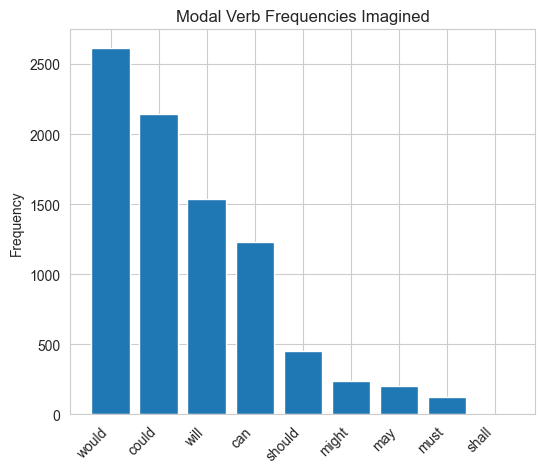

In [36]:
df_imagine = df_1.iloc[:2756]
df_imagine = df_imagine.sample(frac=1).reset_index(drop=True)
# df_imagine.head()
frequency_map = {}

for row in df_imagine['modal_verb_freq']:
    if row:
        for key, value in row.items():
            if key not in frequency_map:
                frequency_map[key] = value
            else:
                frequency_map[key] += value

fig, ax = plt.subplots()

sorted_frequency_map = dict(sorted(frequency_map.items(), key=lambda item: item[1], reverse=True))
print(sorted_frequency_map)

ax.bar(list(sorted_frequency_map.keys()), list(sorted_frequency_map.values()))

# Customize the plot
# ax.set_xlabel('Modal-Verbs-Imagined')
ax.set_ylabel('Frequency')
ax.set_title('Modal Verb Frequencies Imagined')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

{'would': 2671, 'could': 2128, 'will': 1365, 'can': 987, 'should': 352, 'may': 281, 'might': 183, 'must': 94, 'shall': 6}


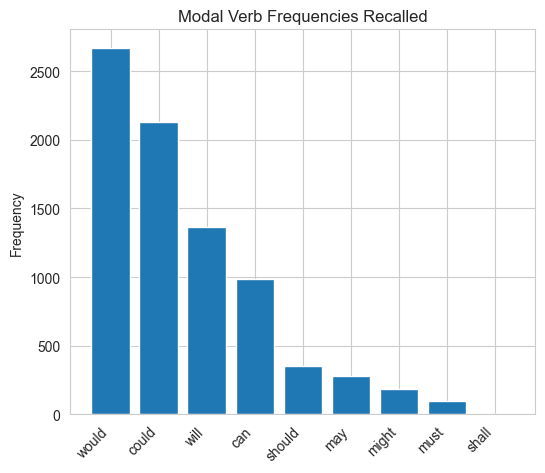

In [37]:
df_recall = df_1.iloc[2756:5535]
df_recall = df_recall.sample(frac=1).reset_index(drop=True)

frequency_map_2 = {}

for row in df_recall['modal_verb_freq']:
    if row:
        for key, value in row.items():
            if key not in frequency_map_2:
                frequency_map_2[key] = value
            else:
                frequency_map_2[key] += value


fig, ax = plt.subplots()
sorted_frequency_map_2 = dict(sorted(frequency_map_2.items(), key=lambda item: item[1], reverse=True))
print(sorted_frequency_map_2)

ax.bar(list(sorted_frequency_map_2.keys()), list(sorted_frequency_map_2.values()))

# Customize the plot
# ax.set_xlabel('Modal-Verbs-Recall')
ax.set_ylabel('Frequency')
ax.set_title('Modal Verb Frequencies Recalled')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

**Speculative Sentence Probability**

In [38]:
def get_sentence_type(sentence):
    doc = nlp(sentence)

    # List of speculative verbs
    speculative_verbs = ["might", "could", "may", "can"]

    # Check for speculative verbs in the sentence
    if any(verb in [token.text.lower() for token in doc] for verb in speculative_verbs):
        return "Speculative"
    else:
        return "Declarative"


def count_sentence_types(text):
    doc = nlp(text)
    sentence_types = [get_sentence_type(sent.text) for sent in doc.sents]

    # Count the number of each sentence type
    counts = {"Speculative": sentence_types.count("Speculative"), "Declarative": sentence_types.count("Declarative")}

    return counts

In [39]:
spec_verbs = ["might", "could", "may", "can", "probably", "definitely", "should be", "shall be", "would", "should have", "shall have"]

def contains_speculative_word(sentence, spec_words):
    doc = nlp(sentence.lower())
    for word in spec_words:
        if " " in word:
            # Check for multi-word expressions
            if all(part in [token.text.lower() for token in doc] for part in word.split()):
                return True
        elif word in [token.text.lower() for token in doc]:
            return True
    return False

def count_sentence_types(text, spec_words):
    doc = nlp(text)
    speculative_count = 0
    declarative_count = 0

    for sent in doc.sents:
        if contains_speculative_word(sent.text, spec_words):
            speculative_count += 1
        else:
            declarative_count += 1

    counts = {"Speculative": speculative_count, "Declarative": declarative_count}
    prob = speculative_count / (speculative_count + declarative_count)
    return counts, prob

In [40]:
df_1['speculative_stat'] = [None]*len(df_1['story'])
df_1['speculative_prob'] = [0]*len(df_1['story'])

In [41]:
for i in range(len(df_1['story'])):
    count, probs = count_sentence_types(df_1['story'][i], spec_verbs)
    df_1.at[i, 'speculative_stat'] = count
    df_1.loc[i, 'speculative_prob'] = probs

/var/folders/z_/gmr1pt353239ypl_8q2ymnjc0000gn/T/ipykernel_33277/1078285476.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.19047619047619047' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1.loc[i, 'speculative_prob'] = probs


{'Speculative': 6422, 'Declarative': 42819}


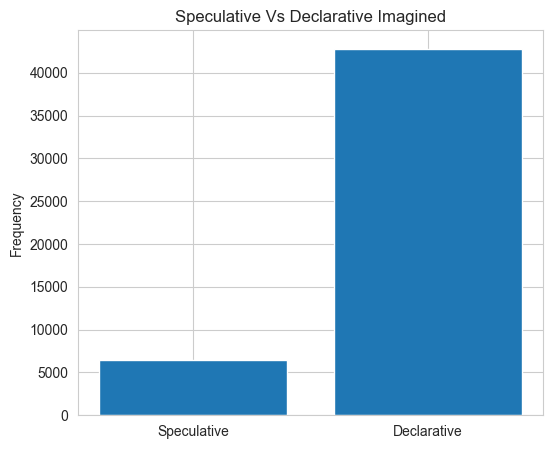

In [42]:
df_imagine = df_1.iloc[:2756]
df_imagine = df_imagine.sample(frac=1).reset_index(drop=True)
# df_imagine.head()
frequency_map = {}

for row in df_imagine['speculative_stat']:
    if row:
        for key, value in row.items():
            if key not in frequency_map:
                frequency_map[key] = value
            else:
                frequency_map[key] += value

print(frequency_map)

fig, ax = plt.subplots()

ax.bar(list(frequency_map.keys()), list(frequency_map.values()))

# Customize the plot
# ax.set_xlabel('Speculative Vs Declarative-Imagined')
ax.set_ylabel('Frequency')
ax.set_title('Speculative Vs Declarative Imagined')

# Rotate x-axis labels for better visibility
# plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

{'Speculative': 6135, 'Declarative': 44492}


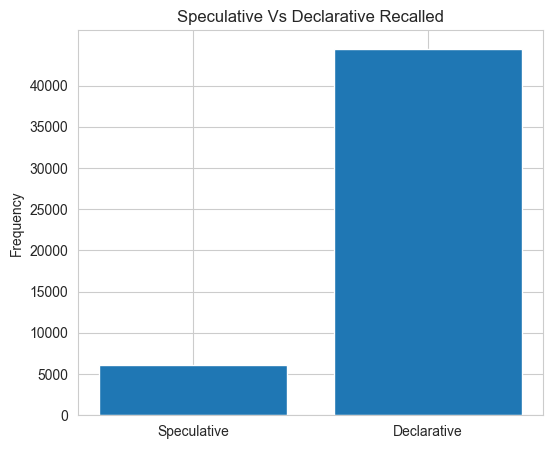

In [43]:
df_recall = df_1.iloc[2756:5535]
df_recall = df_recall.sample(frac=1).reset_index(drop=True)

frequency_map_2 = {}

for row in df_recall['speculative_stat']:
    if row:
        for key, value in row.items():
            if key not in frequency_map_2:
                frequency_map_2[key] = value
            else:
                frequency_map_2[key] += value


print(frequency_map_2)

fig, ax = plt.subplots()

ax.bar(list(frequency_map_2.keys()), list(frequency_map_2.values()))

# Customize the plot
#ax.set_xlabel('SpeculativeVsDeclarative-Recall')
# plt.yticks([i for i in range(0, len(frequency_map_2.values()), 5000)])
tick_interval = 5000  # Adjust this value based on your preference
yticks = range(0, max(frequency_map_2.values()) + 1, tick_interval)
plt.yticks(yticks)
ax.set_ylabel('Frequency')
ax.set_title('Speculative Vs Declarative Recalled')

# Rotate x-axis labels for better visibility
# plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

**Temporal Statements Analysis**

In [44]:
df_1['temporal_count'] = [0] * df_1.shape[0]

def count_temporal_references(text):
    # Load SpaCy model
    # Process the text with SpaCy
    doc = nlp(text)

    # Define temporal reference tags
    temporal_tags = {"DATE", "TIME", "TIMESTAMP", "TEMPORAL", "ORDINAL"}

    # Count temporal references
    temporal_count = sum(1 for token in doc if
                         token.ent_type_ in temporal_tags or token.pos_ == "NUM" or token.text.lower() in {"today",
                                                                                                           "yesterday",
                                                                                                           "tomorrow"})

    return temporal_count

In [45]:
for i in range(df_1.shape[0]):
    temp_count = count_temporal_references(df_1['story'][i])
    df_1.loc[i, 'temporal_count'] = temp_count

df_1.head()

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,contextual,ner_count,type,common_verb,verb_count,common_bigram,modal_verb_freq,speculative_stat,speculative_prob,temporal_count
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,"[-79.30367456754999, -85.43623466981693, -103....",1,0,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2},"{'Speculative': 0, 'Declarative': 15}",0.000000,2
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,"[-110.26714610431748, -76.07691754008206, -122...",10,0,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}","{'Speculative': 4, 'Declarative': 17}",0.190476,16
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,"[-40.44070939889245, -56.481343377038556, -19....",3,0,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}","{'Speculative': 1, 'Declarative': 14}",0.066667,7
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,"[-121.49904027654665, -21.57719919472994, -65....",15,0,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}","{'Speculative': 3, 'Declarative': 22}",0.120000,9
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,"[-69.25817500874533, -64.07665745668302, -78.2...",13,0,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}","{'Speculative': 3, 'Declarative': 15}",0.166667,24


In [46]:
sum_group = df_1.groupby('type')['temporal_count'].mean().to_dict()
sum_group

{0: 9.54499274310595, 1: 12.814681540122345, 2: 10.187263078089462}

**Affect Words**

In [47]:
affect_words = ['happy', 'joyful', 'content', 'please', 'ecstatic', 'elated', 'satisfied', 'sad', 'unhappy', 'sorrowful', 'mournful', 'melancholy', 'depress', 'gloomy', 'angry', 'irritable', 'frustrate', 'annoy', 'enrage', 'furious', 'agitate', 'excite', 'enthusiastic', 'eager', 'thrill', 'animate', 'stimulate', 'passionate', 'fearful', 'anxious', 'nervous', 'terrify', 'panic', 'alarm', 'worried', 'surprised', 'amaze', 'astonish', 'shock', 'startle', 'daze', 'confuse', 'disgust', 'repulse', 'revolt', 'nauseate', 'abhorrent', 'offend', 'appal', 'calm', 'relax', 'peaceful', 'serene', 'compose', 'tranquil', 'soothe', 'tender', 'love', 'affectionate', 'compassionate', 'warm', 'care', 'gentle', 'hopeful', 'optimistic', 'encourage', 'inspire', 'confident', 'uplift', 'positive', 'grateful', 'thankful', 'appreciative', 'bless', 'content', 'satisfied', 'fulfil', 'nice', 'incredible' ,'cry', 'beautiful', 'surreal', 'important']

In [48]:
def calculate_probability_of_affect_words(story):
    # Process the story text using spaCy
    doc = nlp(story)

    # Lemmatize and tokenize the story into words
    words = [token.lemma_.lower() for token in doc if token.is_alpha]

    # Count the occurrences of affect words and total words
    affect_word_count = sum(word in affect_words for word in words)
    total_word_count = len(words)

    # Calculate the probability of affect words
    probability_of_affect_words = affect_word_count / total_word_count if total_word_count > 0 else 0

    return probability_of_affect_words

In [49]:
df_1['affect_words'] = [0] * df_1.shape[0]
for i in range(len(df_1['story'])):
    count = calculate_probability_of_affect_words(df_1['story'][i])
    df_1.loc[i, 'affect_words'] = count

df_1.head()

/var/folders/z_/gmr1pt353239ypl_8q2ymnjc0000gn/T/ipykernel_33277/255456611.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.024630541871921183' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1.loc[i, 'affect_words'] = count


,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,ner_count,type,common_verb,verb_count,common_bigram,modal_verb_freq,speculative_stat,speculative_prob,temporal_count,affect_words
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,1,0,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2},"{'Speculative': 0, 'Declarative': 15}",0.000000,2,0.024631
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,10,0,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}","{'Speculative': 4, 'Declarative': 17}",0.190476,16,0.014981
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,3,0,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}","{'Speculative': 1, 'Declarative': 14}",0.066667,7,0.000000
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,15,0,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}","{'Speculative': 3, 'Declarative': 22}",0.120000,9,0.000000
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,13,0,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}","{'Speculative': 3, 'Declarative': 15}",0.166667,24,0.000000


**Social Words**

In [50]:
social_words_list = ['he', 'she', 'her', 'him', 'they', 'husband', 'wife', 'son', 'daughter', 'family', 'friend', 'girlfriend', 'boyfriend', 'brother', 'sister', 'niece', 'nephew', 'mother', 'father', 'friends', 'families', 'them', 'we']

def calculate_probability_of_social_words(story, social_words):
    # Process the story text using spaCy
    doc = nlp(story)

    # Tokenize the story into words, removing stop words
    words = [token.text.lower() for token in doc if token.is_alpha]

    # Count the occurrences of social words and total words
    social_word_count = sum(word in social_words for word in words)
    total_word_count = len(words)

    # Calculate the probability of social words
    probability_of_social_words = social_word_count / total_word_count if total_word_count > 0 else 0

    return probability_of_social_words


In [51]:
df_1['social_words'] = [0] * df_1.shape[0]
for i in range(len(df_1['story'])):
    count = calculate_probability_of_social_words(df_1['story'][i], social_words_list)
    df_1.loc[i, 'social_words'] = count

df_1.head()

/var/folders/z_/gmr1pt353239ypl_8q2ymnjc0000gn/T/ipykernel_33277/1575429159.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.07389162561576355' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1.loc[i, 'social_words'] = count


,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,type,common_verb,verb_count,common_bigram,modal_verb_freq,speculative_stat,speculative_prob,temporal_count,affect_words,social_words
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,0,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2},"{'Speculative': 0, 'Declarative': 15}",0.000000,2,0.024631,0.073892
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,0,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}","{'Speculative': 4, 'Declarative': 17}",0.190476,16,0.014981,0.063670
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,0,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}","{'Speculative': 1, 'Declarative': 14}",0.066667,7,0.000000,0.024691
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,0,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}","{'Speculative': 3, 'Declarative': 22}",0.120000,9,0.000000,0.059406
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,0,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}","{'Speculative': 3, 'Declarative': 15}",0.166667,24,0.000000,0.042169


**Prepositions**

In [52]:
def calculate_probability_of_prepositions(story):
    # Process the story text using spaCy
    doc = nlp(story)

    # Tokenize the story into words
    words = [token.text.lower() for token in doc]

    # Count the occurrences of prepositions and total words
    preposition_count = sum(token.pos_ == 'ADP' for token in doc)
    total_word_count = len(words)

    # Calculate the probability of prepositions
    probability_of_prepositions = preposition_count / total_word_count if total_word_count > 0 else 0

    return probability_of_prepositions

In [53]:
df_1['preposition_probs'] = [0] * df_1.shape[0]
for i in range(len(df_1['story'])):
    count = calculate_probability_of_prepositions(df_1['story'][i])
    df_1.loc[i, 'preposition_probs'] = count

df_1.head()

/var/folders/z_/gmr1pt353239ypl_8q2ymnjc0000gn/T/ipykernel_33277/3891540866.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.09012875536480687' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1.loc[i, 'preposition_probs'] = count


,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,common_verb,verb_count,common_bigram,modal_verb_freq,speculative_stat,speculative_prob,temporal_count,affect_words,social_words,preposition_probs
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,know,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2},"{'Speculative': 0, 'Declarative': 15}",0.000000,2,0.024631,0.073892,0.090129
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,wait,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}","{'Speculative': 4, 'Declarative': 17}",0.190476,16,0.014981,0.063670,0.085616
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,have,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}","{'Speculative': 1, 'Declarative': 14}",0.066667,7,0.000000,0.024691,0.082873
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,have,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}","{'Speculative': 3, 'Declarative': 22}",0.120000,9,0.000000,0.059406,0.097345
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,get,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}","{'Speculative': 3, 'Declarative': 15}",0.166667,24,0.000000,0.042169,0.101928


**Perceptual Words**

In [54]:
perceptual_words = [
    'see', 'look', 'view', 'watch', 'observe', 'notice', 'perceive', 'discern', 'recognize',
    'hear', 'listen', 'auditory', 'sound', 'smell', 'olfactory', 'taste', 'gustatory',
    'touch', 'tactile', 'feel', 'sensation', 'sensory', 'experience', 'imagine', 'visualize',
    'picture', 'dream', 'fantasize', 'envision', 'recall'
]

def calculate_probability_of_perceptual_words(story, perceptual_words):
    # Process the story text using spaCy
    doc = nlp(story)

    # Lemmatize and tokenize the story into words
    words = [token.lemma_.lower() for token in doc if token.is_alpha]

    # Count the occurrences of perceptual words and total words
    perceptual_word_count = sum(word in perceptual_words for word in words)
    total_word_count = len(words)

    # Calculate the probability of perceptual words
    probability_of_perceptual_words = perceptual_word_count / total_word_count if total_word_count > 0 else 0

    return probability_of_perceptual_words

In [55]:
df_1['perceptual_probs'] = [0] * df_1.shape[0]
for i in range(len(df_1['story'])):
    count = calculate_probability_of_perceptual_words(df_1['story'][i], perceptual_words)
    df_1.loc[i, 'perceptual_probs'] = count

df_1.head()

/var/folders/z_/gmr1pt353239ypl_8q2ymnjc0000gn/T/ipykernel_33277/1710636433.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0049261083743842365' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1.loc[i, 'perceptual_probs'] = count


,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,verb_count,common_bigram,modal_verb_freq,speculative_stat,speculative_prob,temporal_count,affect_words,social_words,preposition_probs,perceptual_probs
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,3,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2},"{'Speculative': 0, 'Declarative': 15}",0.000000,2,0.024631,0.073892,0.090129,0.004926
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,2,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}","{'Speculative': 4, 'Declarative': 17}",0.190476,16,0.014981,0.063670,0.085616,0.018727
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,5,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}","{'Speculative': 1, 'Declarative': 14}",0.066667,7,0.000000,0.024691,0.082873,0.018519
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,4,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}","{'Speculative': 3, 'Declarative': 22}",0.120000,9,0.000000,0.059406,0.097345,0.009901
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,5,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}","{'Speculative': 3, 'Declarative': 15}",0.166667,24,0.000000,0.042169,0.101928,0.024096


**Cause Words**

In [56]:
cause_words = [
    'because', 'since', 'due to', 'as a result', 'thus', 'therefore', 'consequently', 'so', 'for this reason',
    'trigger', 'cause', 'result in', 'lead to', 'produce', 'generate', 'bring about', 'create', 'induce',
    'prompt', 'instigate', 'incite', 'stimulate', 'provoke', 'occasion', 'originate', 'motivate', 'spur', 'influence'
]

def calculate_probability_of_cause_words(story, cause_words):
    # Process the story text using spaCy
    doc = nlp(story)

    # Lemmatize and tokenize the story into words
    words = [token.lemma_.lower() for token in doc if token.is_alpha]

    # Count the occurrences of cause words and total words
    cause_word_count = sum(word in cause_words for word in words)
    total_word_count = len(words)

    # Calculate the probability of cause words
    probability_of_cause_words = cause_word_count / total_word_count if total_word_count > 0 else 0

    return probability_of_cause_words

In [57]:
df_1['cognitive_word_probs'] = [0] * df_1.shape[0]

for i in range(len(df_1['story'])):
    count = calculate_probability_of_cause_words(df_1['story'][i], cause_words)
    df_1.loc[i, 'cognitive_word_probs'] = count

df_1.head()

/var/folders/z_/gmr1pt353239ypl_8q2ymnjc0000gn/T/ipykernel_33277/3950174241.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.019704433497536946' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_1.loc[i, 'cognitive_word_probs'] = count


,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,common_bigram,modal_verb_freq,speculative_stat,speculative_prob,temporal_count,affect_words,social_words,preposition_probs,perceptual_probs,cognitive_word_probs
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,"[((so, incredibly), 3), ((he, got), 2), ((was,...",{'will': 2},"{'Speculative': 0, 'Declarative': 15}",0.000000,2,0.024631,0.073892,0.090129,0.004926,0.019704
1,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,"[((my, sister), 4), ((for, the), 3), ((It, was...","{'could': 2, 'will': 1, 'can': 1, 'would': 1}","{'Speculative': 4, 'Declarative': 17}",0.190476,16,0.014981,0.063670,0.085616,0.018727,0.007491
2,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,"[((I, went), 2), ((went, to), 2), ((to, burnin...","{'should': 1, 'would': 1}","{'Speculative': 1, 'Declarative': 14}",0.066667,7,0.000000,0.024691,0.082873,0.018519,0.012346
3,36WLNQG780WFTLD990VT6XXEYVQEBZ,2062,8YBMU0DD,35.0,woman,black,3.0,1.0,NaN,4.0,...,"[((We, were), 3), ((we, were), 3), ((to, get),...","{'would': 1, 'could': 2}","{'Speculative': 3, 'Declarative': 22}",0.120000,9,0.000000,0.059406,0.097345,0.009901,0.013201
4,32Z9ZLUT1M6BWPTK368LXKUQWLLOHY,2213,0NZUIXNP,25.0,woman,white,1.0,1.0,NaN,4.0,...,"[((of, the), 5), ((in, the), 3), ((I, have), 3)]","{'would': 1, 'could': 2, 'must': 1}","{'Speculative': 3, 'Declarative': 15}",0.166667,24,0.000000,0.042169,0.101928,0.024096,0.006024


In [58]:
df_1.columns

Index(['AssignmentId', 'WorkTimeInSeconds', 'WorkerId', 'annotatorAge',
       'annotatorGender', 'annotatorRace', 'distracted', 'draining',
       'frequency', 'importance', 'logTimeSinceEvent', 'mainEvent', 'memType',
       'mostSurprising', 'openness', 'recAgnPairId', 'recImgPairId',
       'similarity', 'similarityReason', 'story', 'stressful', 'summary',
       'timeSinceEvent', 'sequentiality', 'topic_output', 'contextual',
       'ner_count', 'type', 'common_verb', 'verb_count', 'common_bigram',
       'modal_verb_freq', 'speculative_stat', 'speculative_prob',
       'temporal_count', 'affect_words', 'social_words', 'preposition_probs',
       'perceptual_probs', 'cognitive_word_probs'],
      dtype='object')

In [59]:
df_tr = df_1.iloc[:5535]
df_tr = df_tr.sample(frac=1).reset_index(drop=True)
df_tr.shape

(5535, 40)

**Feature Selection**
ANOVA (Analysis of Variance) Test

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_classif, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [61]:
from sklearn.model_selection import train_test_split

X = df_tr.loc[:, ["temporal_count", "speculative_prob", "ner_count", "sequentiality", "stressful", "social_words",
                  "preposition_probs", "affect_words", "perceptual_probs", "cognitive_word_probs"]]
Y = df_tr.loc[:, ["type"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [62]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

/Users/satya/Desktop/topics_in_ai/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


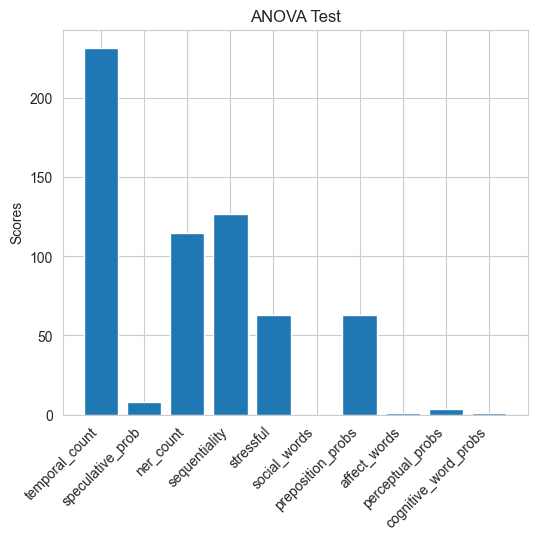

In [63]:
features = ["temporal_count", "speculative_prob", "ner_count", "sequentiality", "stressful" , "social_words", "preposition_probs", "affect_words", "perceptual_probs", "cognitive_word_probs"]
# for i in range(len(fs.scores_)):
#  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([features[i] for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
# plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('ANOVA Test')

plt.show()

**Kendall Rank Correlation**

In [64]:
corr = X.corr(method='kendall')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'temporal_count'),
  Text(1.5, 0, 'speculative_prob'),
  Text(2.5, 0, 'ner_count'),
  Text(3.5, 0, 'sequentiality'),
  Text(4.5, 0, 'stressful'),
  Text(5.5, 0, 'social_words'),
  Text(6.5, 0, 'preposition_probs'),
  Text(7.5, 0, 'affect_words'),
  Text(8.5, 0, 'perceptual_probs'),
  Text(9.5, 0, 'cognitive_word_probs')])

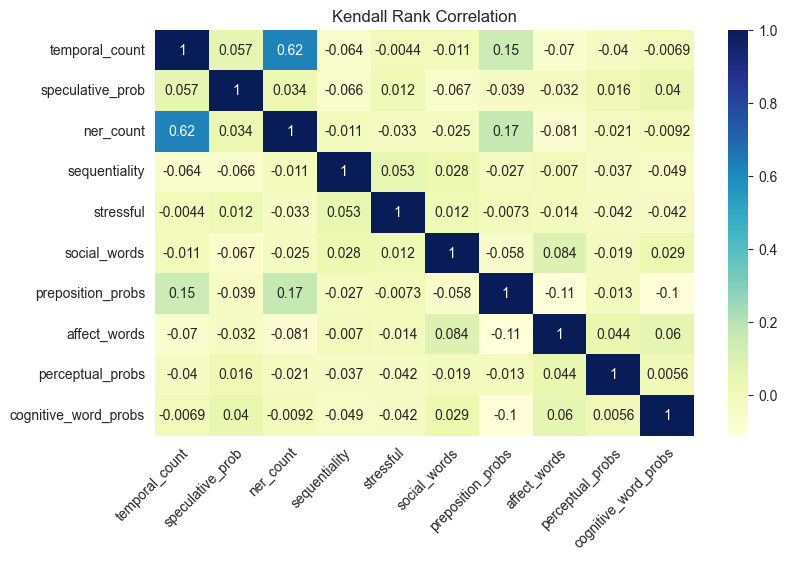

In [65]:
rcParams['figure.figsize'] = 8.7,5.27
ax = sb.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
          annot=True)
ax.set_title("Kendall Rank Correlation")
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

In [66]:
# df_1.to_csv('final.csv', Index=False)